# La esperanza no está perdida ... el lado oscuro aún puede estar ahí

Veamos qué quiere decir que no vea señal de rayos gamma cuando observo el clúster de Perseus. Eso no significa que no nos lleguen, solo que, si nos llegan, lo hace una cantidad menor que un cierto número. ¡Veámoslo!

In [1]:
%matplotlib inline
%pylab inline
import math
import numpy as np
import matplotlib.pyplot as pl
import random as rnd

Populating the interactive namespace from numpy and matplotlib


Lo primero es implementar el modelo teórico que nos indica cuántos rayos gamma nos llegan desde el clúster de Perseus. Eso depende de a que parte de Perseus estemos mirando y se puede simplificar con un parámetro indicando el radio de la circumferencia que estamos observando (r). También depende de un factor de normalización que llamaremos N0.

Para saber cuántos rayos gamma nos llegan para cada valor de los parámetros, lo mejor es definirnos una función. Ya habéis usado muchas funciones de python. Veamos ahora como se define una... es fácil:

In [2]:
def NumeroRayosGamma( No, r ):
    if r <= 0.1 :
        Num = No* math.pi*r**(2.0)
    if r > 0.1 :
        Num = No* math.pi*(0.1**(2.0)+1e-4*(0.1**(-2.0)-r**(-2.0)))
    return Num

¡Que sí! ¡Que sí que es fácil!
Primero se define la función en sí: como se llama y que parámetros le pasamos.

> def NumeroRayosGamma( No, r ):

I después definimos que hace la función. Como os comentaba, el número de rayos gamma que nos llegan del clúster de Perseus depende de qué parte dentro del clúster miramos. De hecho, el valor es constante si miramos a menos de 0.1 grados del centro, pero se reduce rápidamente (con el radio a la cuarta potencia) si miramos más lejos. Para tener en cuenta las dos opciones hemos utilizado la condición ** if **:

> if r <= 0.1 :
> if r > 0.1 :

Y dentro de cada condición calculamos cuántos rayos gamma vemos mirando desde el centro del clúster hasta el valor de radio (r) y la normalización (No) que pasamos a la función.

Finalmente, le decimos a la función que nos devuelva el número de rayos gamma calculados:

> return Num

¡Atención! Donde empieza cada línea de código es relevante ... para mí es lo más molesto de Python.

--------------

Ahora sólo tenemos que poner una línea de código para saber cuántos rayos gamma nos deberían llegar. Por ejemplo si miramos dentro de 0.2 grados y asumimos un factor de normalización 1000:

> NumeroRayosGamma( 1000, 0.2 )

In [3]:
NumeroRayosGamma( 1000, 0.2 )

54.97787143782138

De hecho, antes vimos que si cuento eventos en las dos primeras divisiones de mi ** Thetaplot **, tengo:

> Eventos ON = 18477.0  
> Eventos OFF = 18338.0

Como tengo 40 divisiones en ** Theta Cuadrado ** entre 0 y 0.40, eso quire decir que las dos primeras divisiones cubren 0.02 grados cuadrados en theta cuadrado, que se traduce en raiz cuadrada de 0.02 (0.1414) grados. Por tanto para una normalización de 1000 esperamos que nos lleguen

In [4]:
print (NumeroRayosGamma( 1000, 0.1414 ), "rayos gamma")

47.1191445659 rayos gamma


Ahora tenemos que hacer algo parecido a lo que hizo Alba para entender qué quiere decir la ** Significancia **. ¿Os acordáis?

Tenemos que como valor medio hay 18338 eventos de ruido y que de media nos llegan 47.1 eventos. Pero eso son los valores medios. Si observamos una sola vez por las más de 100 horas que lo hemos hecho los valores pueden ser diferentes. Como pasaba con las observaciones que simulaba Alba asumiendo que no había señal. Solo que ahora asumiremos que la señal es de media 47.1 rayos gamma.

Ahora que sabéis como se define una función, ya no hace falta usarlas :D. Así que veamos como hacemos para simular esas observaciones.

-------

Primero definimos dónde queremos poner los resultados de la simulación y inicializamos la función **rnd** que nos genera números aleatorios:

In [5]:
sigma = np.zeros(10000)
exceso = np.zeros(10000)
rnd.seed(1975)

Así he creado una variable **sigmas** y otra **exceso** que por ahora son un conjunto de 10000 ceros.

Con "rnd.seed(1975)" le doy la semilla al generador de números aleatorios para que empiece a generarlos. Eso es necesario por que por ahora los ordenadores no saben hacer cosas 100% aleatorias (bueno, tampoco tengo claro que yo supiera hacerlo), son pseudo-aleatorias y la serie queda definida por la semilla. Pero es más que suficiente para lo que necesitamos.

----------

Ahora simulamos 10000 observaciones para los que tenemos de media 18338.0 eventos OFF y 18338.0+47.1 eventos ON y vemos cuantos excesos hay para cada observación simulada.


In [6]:
test = NumeroRayosGamma(1000,0.02**(0.5))
for x in range(0, 10000):
      EventosON=rnd.gauss(18338, (18338)**(0.5))+rnd.gauss(test, (test)**(0.5));
      EventosOFF=rnd.gauss(18338, 18338**(0.5));
      sigma[x] = (EventosON-EventosOFF)/(EventosON+EventosOFF)**(0.5)
      exceso[x] = EventosON - EventosOFF

Para no tener que escribir muchas veces 47.1, me he creado una variable donde pongo el valor de los rayos gamma que espero usando la función que hemos definido antes. Además eso me permite mirar qué pasa con un valor diferente de rayos gamma esperados solo cambiando una linea de código:

> test = NumeroRayosGamma(1000,0.02**(0.5))

----------

Alba usaba la variable **sigma**, nosotros usaremos la variable **exceso**. Veamos qué distribución tiene.

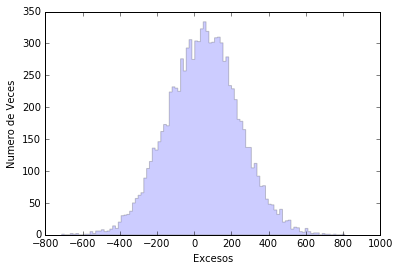

In [7]:
veces, excesos, _ = pl.hist(exceso, bins=100, histtype='stepfilled',alpha=0.2, normed=False)
pl.xlabel('Excesos')
pl.ylabel('Numero de Veces')
pl.show()

Ahora veamos qué porcentaje de estas observaciones simuladas nos darían más excesos de los que vemos en los datos (18477-18338 = 139). Para eso usamos las veces que un exceso se produce y que he guardado en **veces** y **excesos** usando el gráfico que acabo de generar. ¿Te acuerdas como se hace esto? Con "veces, excesos, _ = pl.hist(exceso, bins=100, histtype='stepfilled',alpha=0.2, normed=False)" guardo los valores del eje Y del gráfico en ** veces ** y los del eje X en ** excesos **.

Ahora puedo hacer un bucle dando valores a x entre 0 y 100 ( "for x in range(0,100):" ) y comprobar cuándo tenemos más que los que hemos observado en nuestra observación real. Es básicamente lo mismo que hizo Alba para ver la probabilidad de tener 2.7 sigmas.

In [8]:
VecesAcumuladas = np.cumsum(veces)
Probabilidad = 1.0-VecesAcumuladas/(VecesAcumuladas.max())
for x in range(0,100):
        if excesos[x] > (18477.0-18338):
                print ("La Probabilidad de tener más de ", 18477.0-18338, "eventos es: ", Probabilidad[x]*100, "%")
                break

La Probabilidad de tener más de  139.0 eventos es:  28.83 %


Cuando no tenemos señal en nuestras observaciones, lo que hacemos es poner un límite superior a los rayos gamma que nos están llegando. Una forma de hacerlo es buscar el valor de rayos gamma para el cual el 95% de las veces tendríamos más excesos de los que hemos observado. Con la hipótesis de N0 = 1000, nos quedamos lejos.

------

Ahora es cuando me va muy bien usar la variable ** test ** y tener definida la función ** NumeroRayosGamma( No, r ) **. Hace más fácil buscar para que valor de N0 se cumple la condición.

La Probabilidad de tener más de  139.0 eventos es:  94.64 %, cuando esperamos  471.238898038 rayos gamma, que se obtienen con N0 =  10000


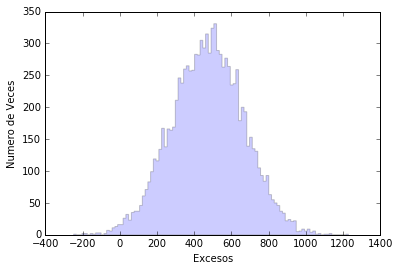

In [9]:
test = NumeroRayosGamma(10000,0.02**(0.5))
for x in range(0, 10000):
      EventosON=rnd.gauss(18338, (18338)**(0.5))+rnd.gauss(test, (test)**(0.5));
      EventosOFF=rnd.gauss(18338, 18338**(0.5));
      sigma[x] = (EventosON-EventosOFF)/(EventosON+EventosOFF)**(0.5)
      exceso[x] = EventosON - EventosOFF
veces, excesos, _ = pl.hist(exceso, bins=100, histtype='stepfilled',alpha=0.2, normed=False)
pl.xlabel('Excesos')
pl.ylabel('Numero de Veces')
VecesAcumuladas = np.cumsum(veces)
Probabilidad = 1.0-VecesAcumuladas/(VecesAcumuladas.max())
for x in range(0,100):
        if excesos[x] > (18477.0-18338):
                print ("La Probabilidad de tener más de ", 18477.0-18338, "eventos es: ", Probabilidad[x]*100, "%, cuando esperamos ", test, "rayos gamma, que se obtienen con N0 = ",10000) 
                break

** N0 ** está relacionado con la cantidad de materia oscura que hay en el clúster de Perseus. Así que mis datos no me dicen que no haya materia oscura allí, solo que hay menos que una cierta cantidad ... la esperanza no está perdida.